# <center> ML-4. Обучение без учителя: кластеризация и техники понижения размерности
---

### 2. Введение в обучение без учителя. Базовая кластеризация

##### АЛГОРИТМ K-MEANS

```Python
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_
```

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict:

```Python
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)
```

параметры кластеризации:

`n_clusters` — количество кластеров. По умолчанию — 8.

`init` — способ инициализации центроидов. Есть две опции: `random` (выбирает центроиды случайным образом) и `k-means++` (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется `k-means++`.

`n_init` — количество случайных инициализаций алгоритма *k-means*. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия *k-means*. По умолчанию `n_init = 10`.

`max_iter` — максимальное количество итераций алгоритма *k-means* при одном запуске. По умолчанию — 300.

`random_state` — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

In [140]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

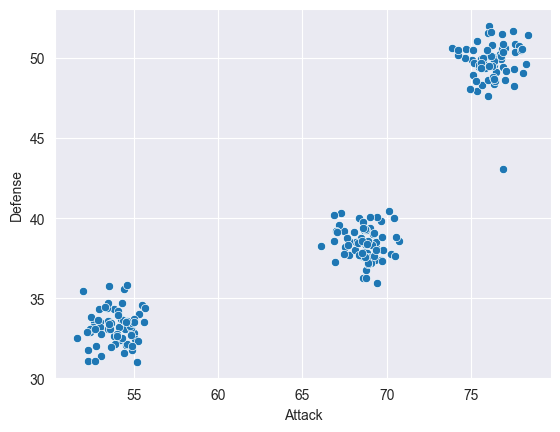

In [141]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

<Axes: xlabel='Attack', ylabel='Defense'>

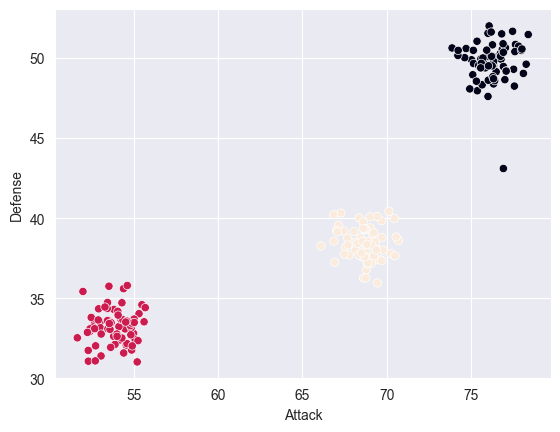

In [142]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

<Axes: xlabel='Attack', ylabel='Defense'>

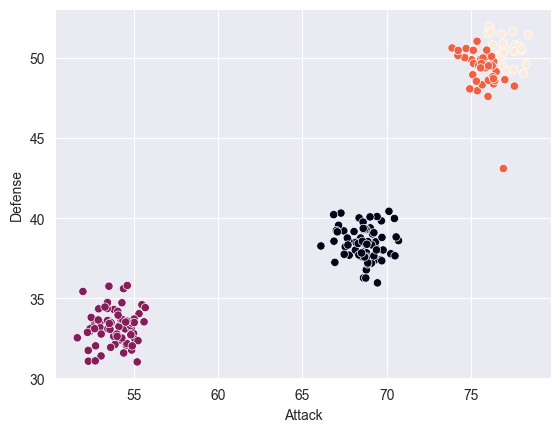

In [143]:
# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

In [144]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

##### ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА K-MEANS

Метод локтя:

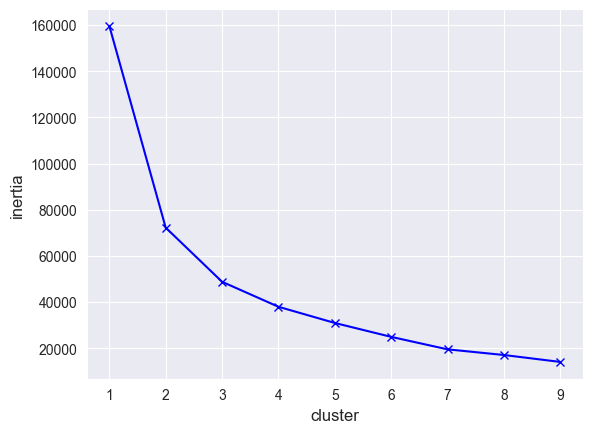

In [145]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Коэффициент силуэта:

<Axes: xlabel='cluster', ylabel='silhouette'>

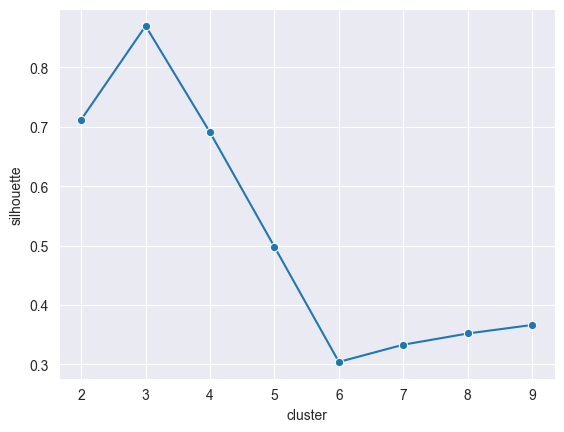

In [146]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

<Axes: xlabel='cluster', ylabel='silhouette'>

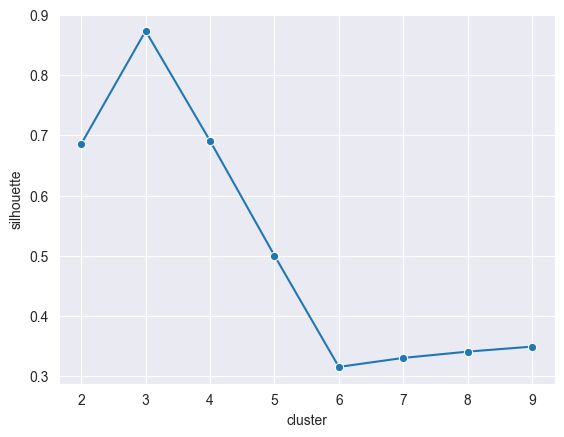

In [147]:
# Задание 2.7
# Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.
# Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.
# Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.
data = pd.read_csv('data/values_from_the_instrument.csv')

silhouette_res = {"silhouette": [], "cluster": []}

X = data[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
silhouette_df = pd.DataFrame(silhouette_res)

sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

---
### 3. Метрики

ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)

In [148]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
# 1.0
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))
# 1.0

1.0
1.0


In [149]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# 1.0
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# 1.0

1.0
1.0


ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)

In [150]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])
# 1.0

1.0

In [151]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# 1.0
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# 0.829867483307009

1.0
0.8334191510029214


V-МЕРА (V-MEASURE)

In [152]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# 1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# 0.9070246789753754

1.0
0.9091419717602737


ИНДЕКС РЭНДА

In [153]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
# 1.0

1.0

In [154]:
# Задание 3.3
# Для пяти объектов вы провели кластеризацию k-means. Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. 
# В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.
# Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]), 2))

0.74


---
### 4. Иерархическая кластеризация

Базовые параметры, которые необходимо передать в **AgglomerativeClustering**:

`n_clusters` — количество кластеров; по умолчанию — 2.

`linkage` — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать `single`, `ward`, `average`, `complete`; по умолчанию используется `ward`.

In [155]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

---
### 5. EM-алгоритмы кластеризации

In [156]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

`n_components` — количество кластеров.

`random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

In [157]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)
# Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:
# class GaussianMixture(sklearn.mixture._base.BaseMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

In [158]:
#Задание 5.4
# Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. 
# Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?
housing_df = pd.read_csv('data/housing.csv')
housing_df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [159]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

<Axes: xlabel='cluster', ylabel='silhouette'>

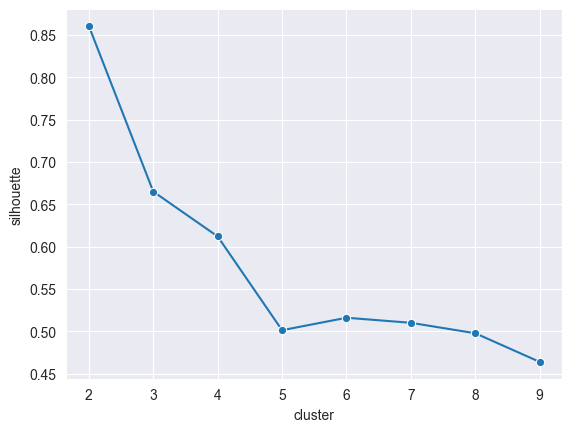

In [160]:
def get_silhouette_gm(cluster_num, X):
    gm_clustering = GaussianMixture(n_components=cluster_num, random_state=42)
    gm_clustering.fit(X)
    silhouette = silhouette_score(X, gm_clustering.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

X = housing_df[['year', 'price']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_gm(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
silhouette_df = pd.DataFrame(silhouette_res)

sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

Силуэт почему-то не работает.

<Axes: xlabel='year', ylabel='price'>

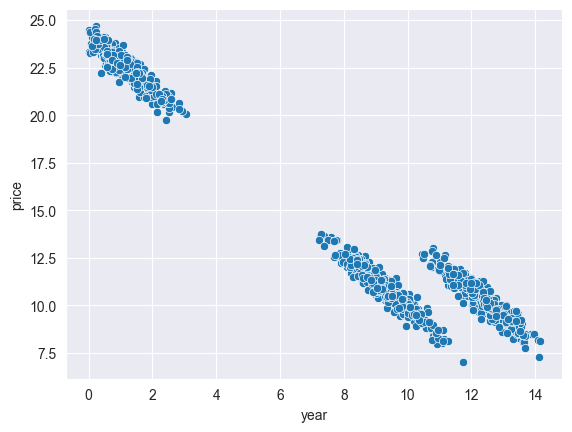

In [161]:
sns.scatterplot(x=housing_df.year, y=housing_df.price)

<Axes: xlabel='year', ylabel='price'>

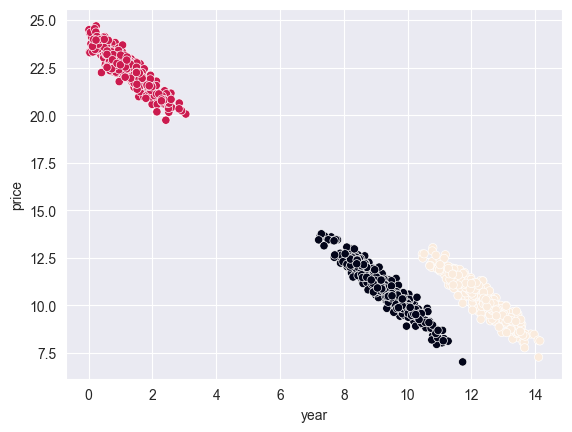

In [162]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)
 
gm_clustering.fit(X)

gm_prediction = gm_clustering.predict(X)

housing_df['Clusters_k3'] = gm_prediction
sns.scatterplot(x=housing_df.year, y=housing_df.price, c=housing_df.Clusters_k3)

<Axes: xlabel='year', ylabel='price'>

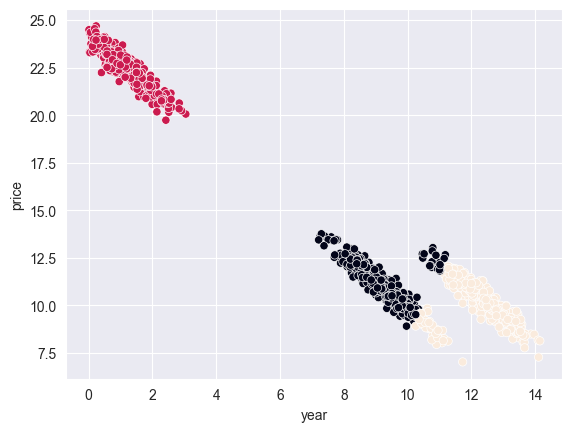

In [163]:
# Задание 5.5
# Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

kmeans.fit(X)

predictions = kmeans.predict(X)
predictions = kmeans.labels_

housing_df['Clusters_kmeans_k3'] = predictions

sns.scatterplot(x=housing_df.year, y=housing_df.price, c=housing_df.Clusters_kmeans_k3)

---
### 6. Спектральная кластеризация

##### СЕГМЕНТАЦИЯ ИЗОБРАЖЕНИЙ

In [164]:
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2

In [165]:
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

In [166]:
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)

In [167]:
graph.data = np.exp(-graph.data / graph.data.std())

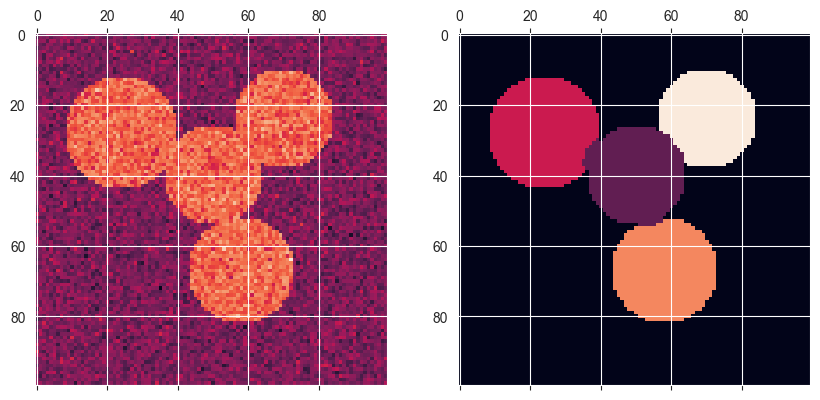

In [168]:
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

##### КАК ЗАПУСТИТЬ СПЕКТРАЛЬНУЮ КЛАСТЕРИЗАЦИЮ?

In [169]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering

# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

Основные параметры SpectralClustering:

`n_clusters` — количество кластеров; по умолчанию — 8.

`random_state` — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

---
### 7. Кластеризация на основе плотности

##### DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

<Axes: xlabel='Attack', ylabel='Defense'>

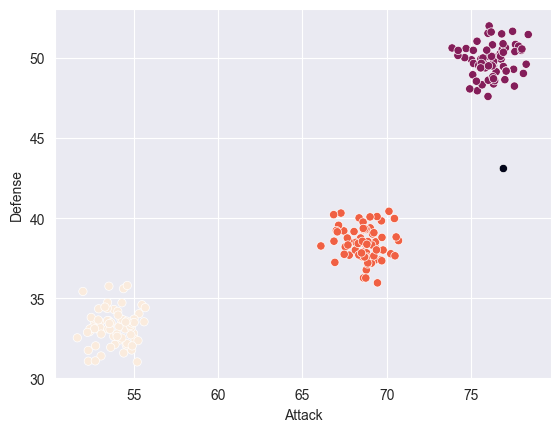

In [170]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

Основные параметры для запуска DBSCAN:

`eps` — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме *DBSCAN*. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.

`min_samples` — задаёт минимальное количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

<Axes: xlabel='year', ylabel='price'>

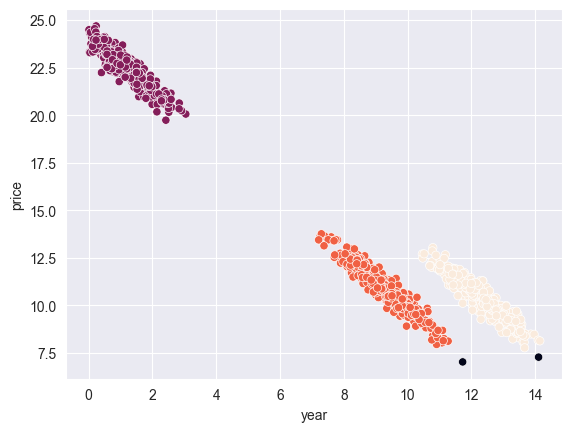

In [171]:
# Задание 7.5
# Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?
clustering = DBSCAN().fit(housing_df[['year', 'price']])

sns.scatterplot(x=housing_df.year, y=housing_df.price, c=clustering.labels_)

<Axes: xlabel='year', ylabel='price'>

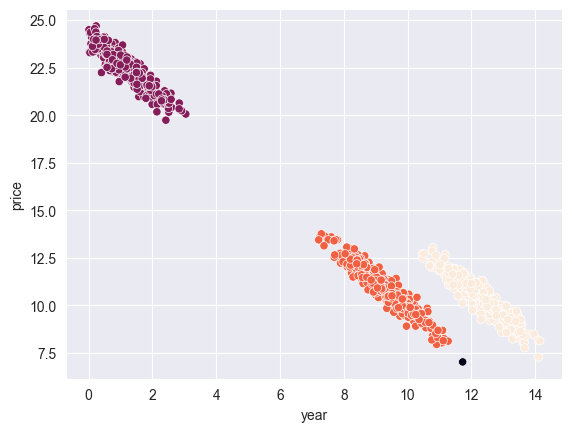

In [172]:
# Задание 7.6
# В предыдущем задании алгоритм DBSCAN ошибочно определил точку у жёлтого кластера как выброс. Так произошло потому, что алгоритм запускался с параметрами по умолчанию.
# Какие значения параметров eps и min_samples подойдут для верной кластеризации данных?
clustering = DBSCAN(eps=0.7, min_samples=5).fit(housing_df[['year', 'price']])

sns.scatterplot(x=housing_df.year, y=housing_df.price, c=clustering.labels_)

---
### 8. Визуализация результатов кластеризации

In [173]:
# импортируем библиотеки, которые нам понадобятся для работы с датафреймом, кластеризацией и визуализацией
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("data/airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: xlabel='latitude', ylabel='longitude'>

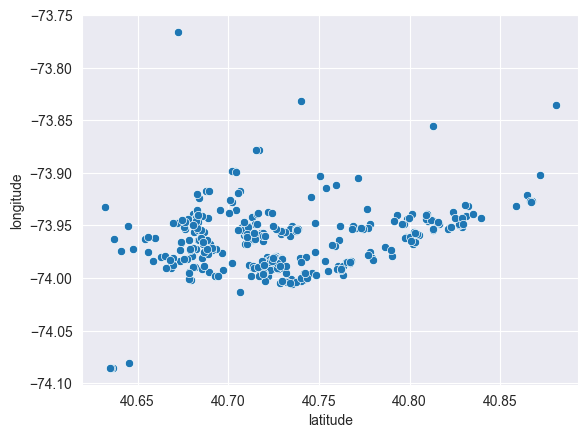

In [174]:
sns.scatterplot(x=df.latitude, y=df.longitude)

##### 2D-ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ И ЦЕНТРОИДОВ

ДИАГРАММА РАССЕЯНИЯ

In [175]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [176]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2,40.677937,-73.967837,#2095DF
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0,40.735543,-73.988864,#DF2020
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.812241,-73.943805,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2,40.677937,-73.967837,#2095DF
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.812241,-73.943805,#81DF20


<Axes: xlabel='latitude', ylabel='longitude'>

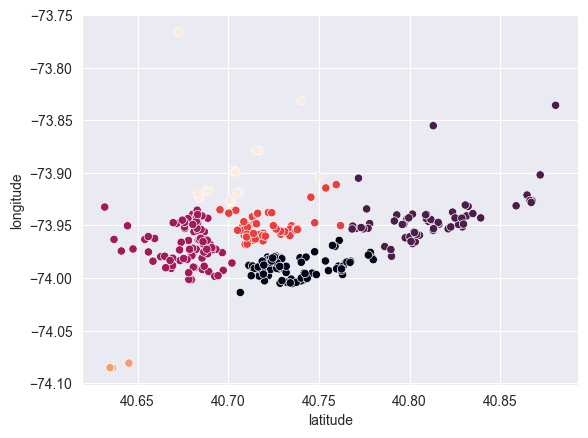

In [177]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.clusters)

<Axes: xlabel='latitude', ylabel='longitude'>

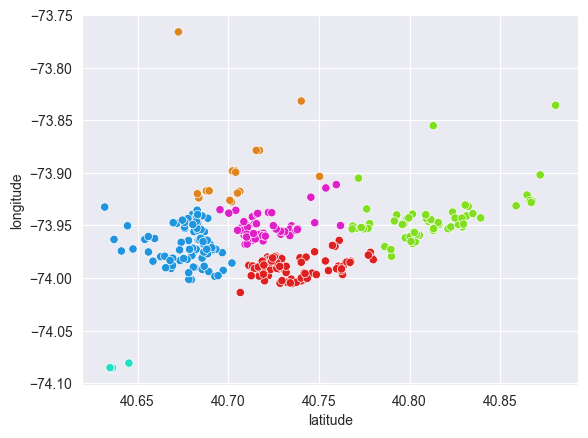

In [178]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color)

<Axes: xlabel='latitude', ylabel='longitude'>

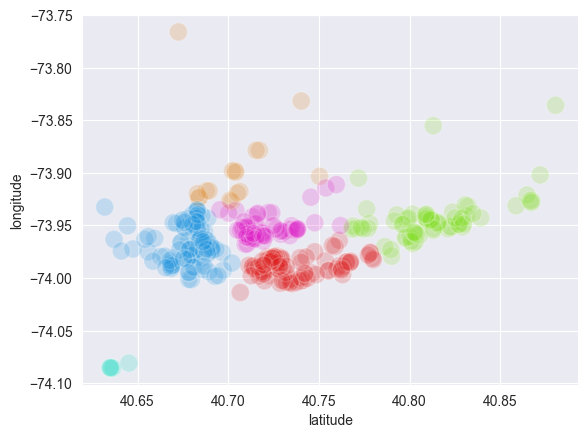

In [179]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170)

<Axes: xlabel='latitude', ylabel='longitude'>

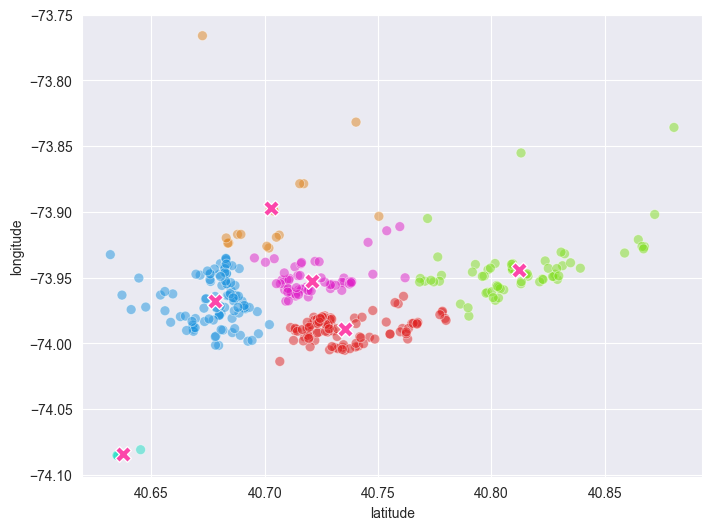

In [180]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

CONVEX HULL

```sh
pip install scipy
```

In [181]:
from scipy.spatial import ConvexHull 
import numpy as np

In [182]:
points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

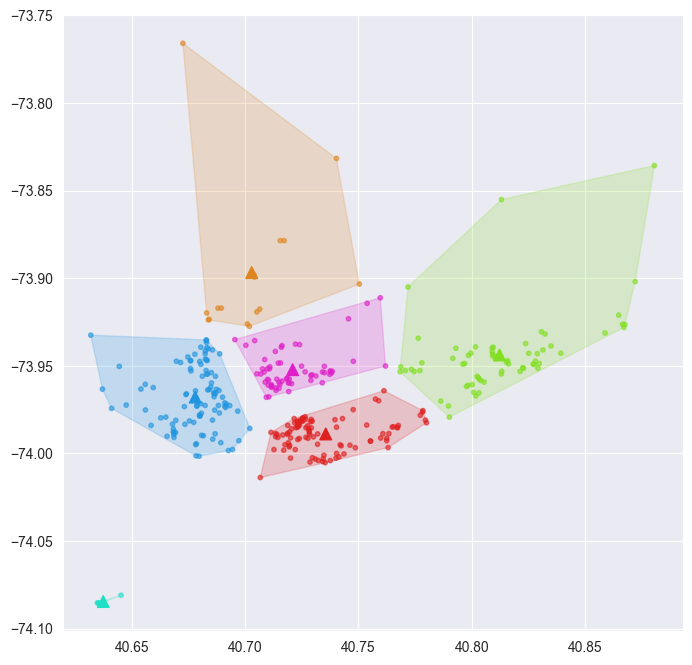

In [183]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

ДЕНДРОГРАММА

* `Z` — расстояния до объектов кластеров, полученные из функции `linkage`.
* `orientation` — ориентация дендрограммы. Данный параметр может принимать значения `top`, `bottom`, `left`, `right`.
* `labels` — список с предсказаниями, к какому кластеру какой объект относится.
* `distance_sort` — определяет, в каком порядке будут визуализированы кластеры: `ascending` или `True` означает, что сначала отрисовывается пара кластеров с максимальным расстоянием между ними; `descending` или `False` — что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.

In [184]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

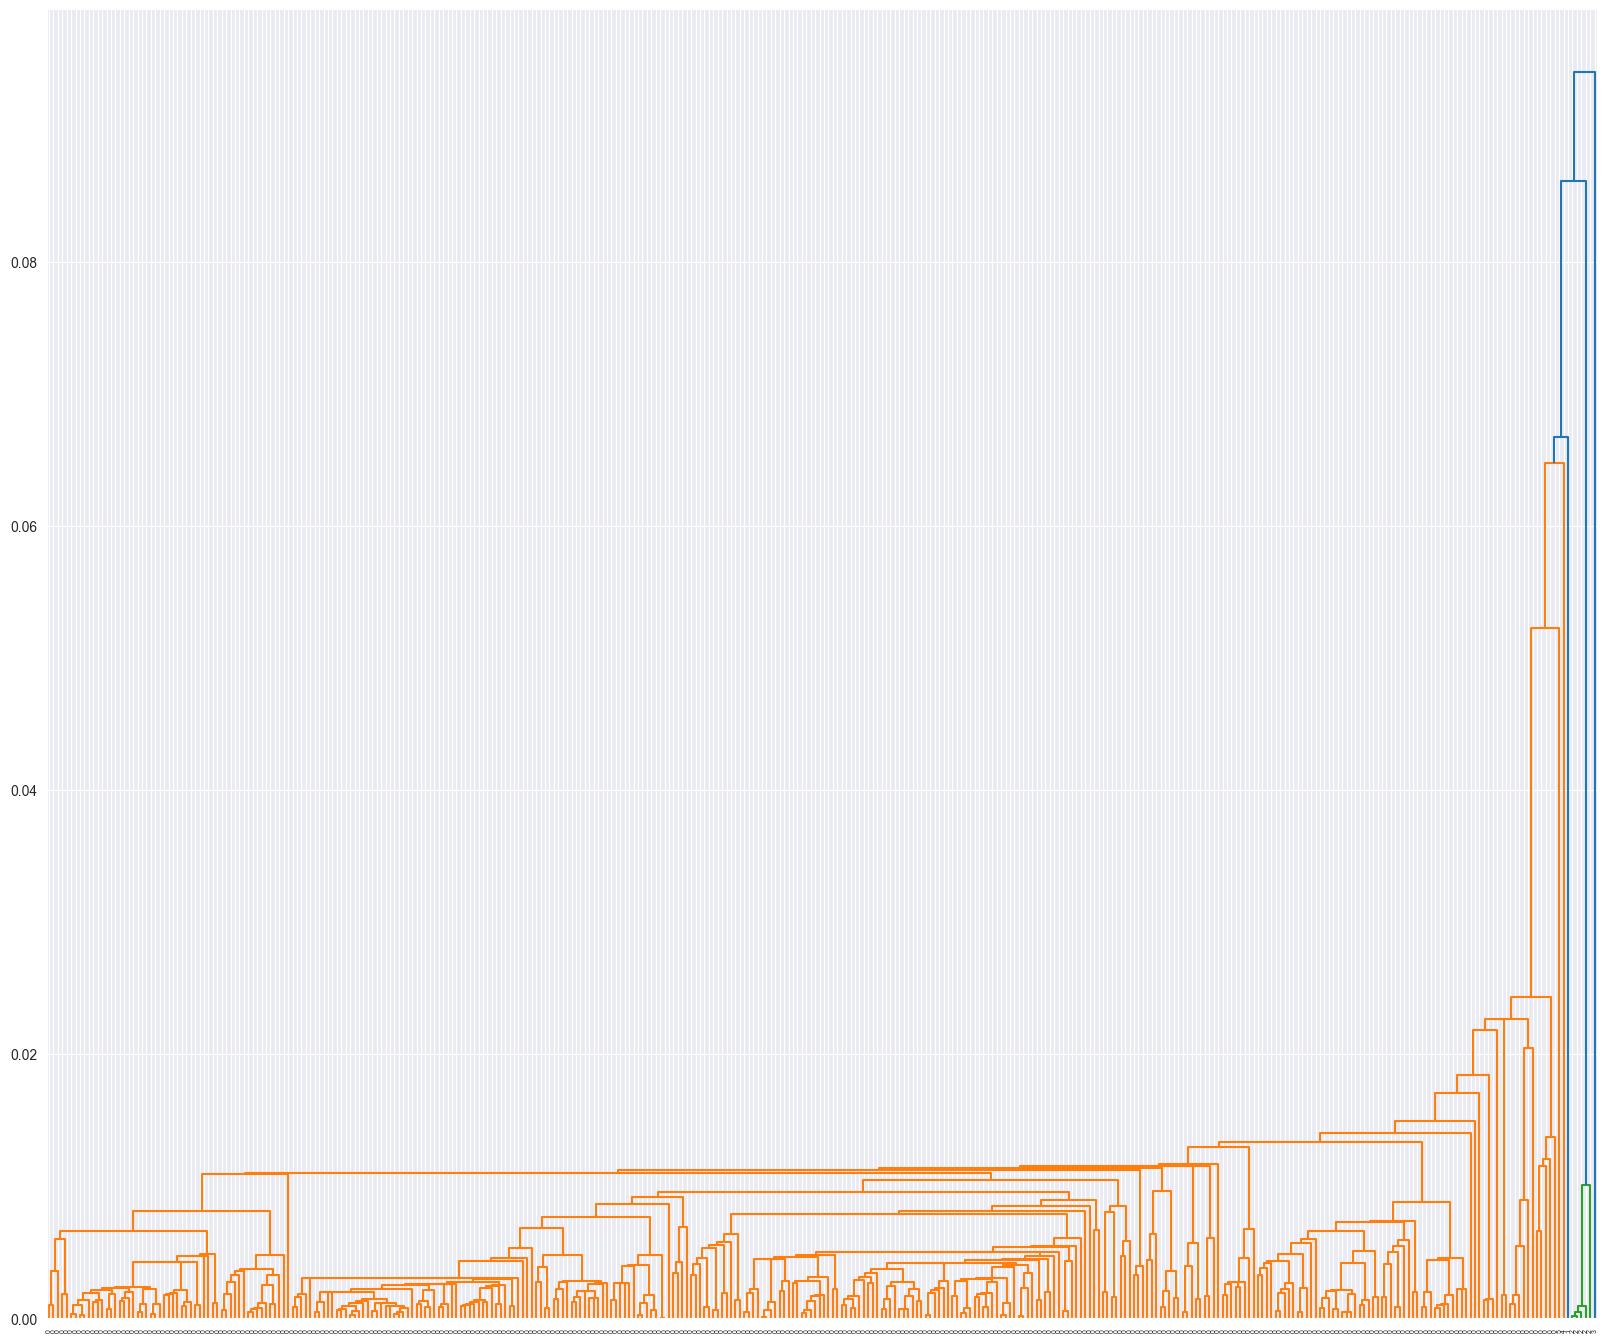

In [185]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

CLUSTERGRAM

```sh
pip install clustergram
```

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.027 seconds.
K=3 fitted in 0.029 seconds.
K=4 fitted in 0.030 seconds.
K=5 fitted in 0.030 seconds.
K=6 fitted in 0.033 seconds.
K=7 fitted in 0.031 seconds.


c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

K=8 fitted in 0.041 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

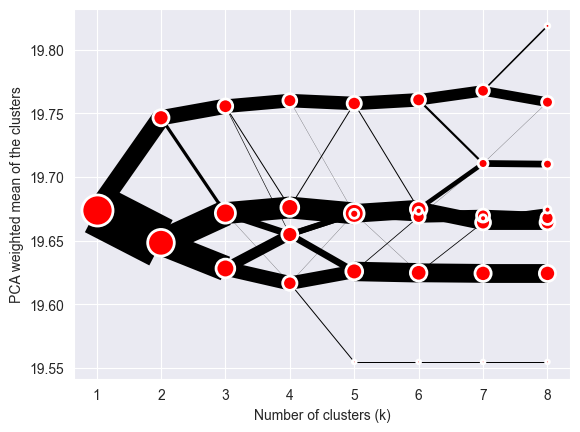

In [186]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

##### 3D-ВИЗУАЛИЗАЦИЯ

In [187]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0.5, 0, 'price')

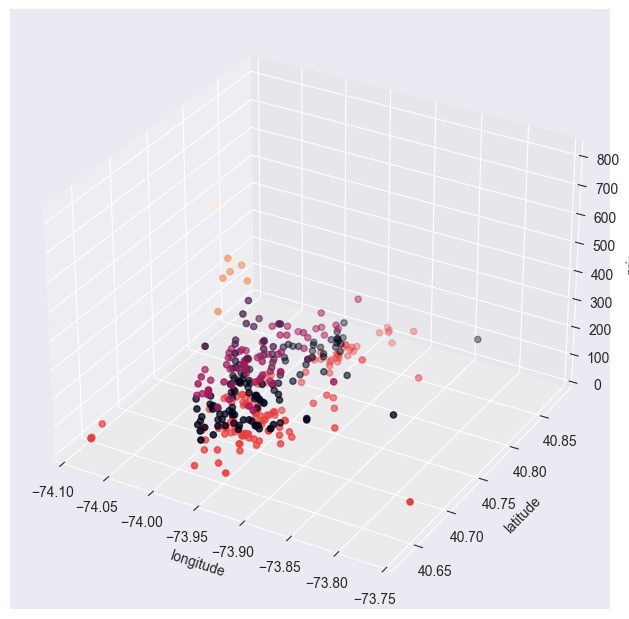

In [188]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=df.longitude.to_list(), ys=df.latitude.to_list(), zs=df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

* `ax.azim` — куб будет вращаться слева направо в зависимости от изменения этой величины;
* `ax.elev` — куб будет вращаться снизу вверх в зависимости от изменения данной величины.

Text(0.5, 0, 'price')

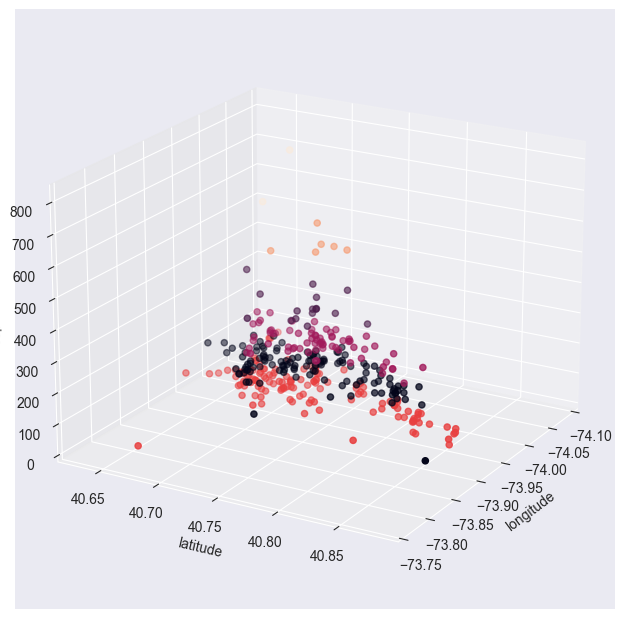

In [189]:
from mpl_toolkits.mplot3d import Axes3D

# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=df.longitude.to_list(), ys=df.latitude.to_list(), zs=df.price.to_list(), c=df.clusters_3d)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [190]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters_3d', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

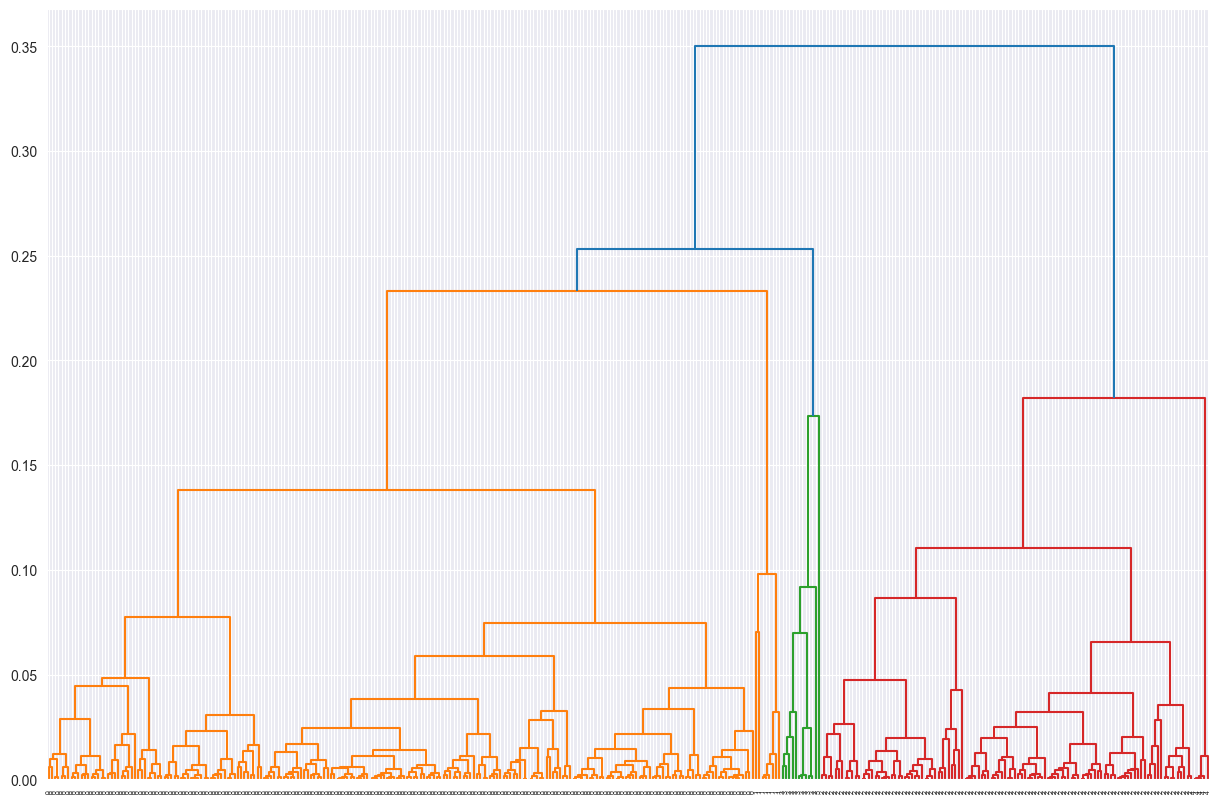

In [191]:
# Задание 8.4
# Для датасета Airbnb проведите иерархическую агломеративную кластеризацию с использованием sklearn. 
# В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. 
# Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.
# Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete')

predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

linked = linkage(df[["latitude", "longitude"]], 'complete')

plt.figure(figsize=(15, 10))

dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

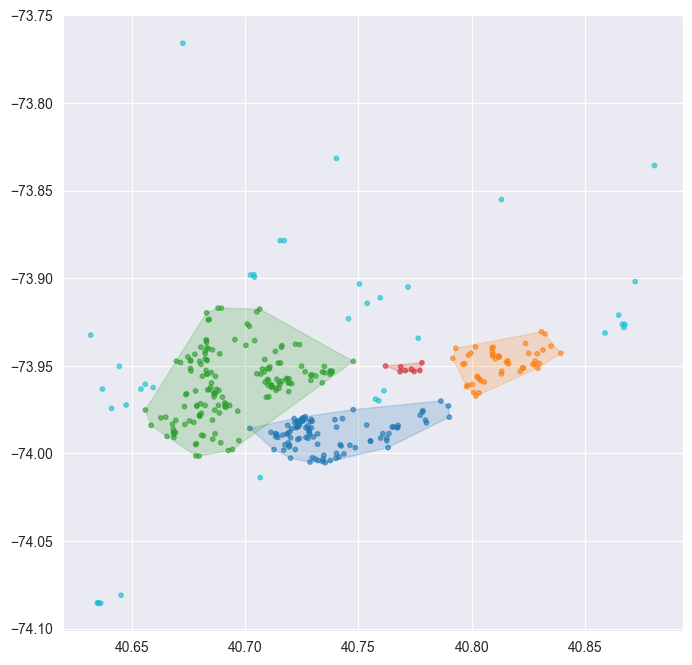

In [196]:
# Задание 8.5
# Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. 
# Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.
# Визуализируйте результаты. Сколько кластеров получилось на графике?
clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude', 'longitude']])
df['clusters_DBSCAN'] = clustering.fit_predict(df[['latitude', 'longitude']])
df['colors_DBSCAN'] = df['clusters_DBSCAN'].apply(lambda x: sns.color_palette()[x])

fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.latitude, df.longitude, c=df.colors_DBSCAN, alpha = 0.6, s=10)

for i in df.clusters_DBSCAN.unique():
    if i >= 0:
        points = df[df.clusters_DBSCAN == i][['latitude', 'longitude']].values
        hull = ConvexHull(points)
        x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
        y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
        plt.fill(x_hull, y_hull, alpha=0.2, c=sns.color_palette()[i])

---
### 9. PCA и t-SNE, или зачем понижать размерность?